# **Load Dataset**

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("/content/Cleaned-Data.csv")

In [6]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,China
1,1,1,1,1,1,0,1,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,China
2,1,1,1,1,1,0,1,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,China
3,1,1,1,1,1,0,1,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,China
4,1,1,1,1,1,0,1,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,China


# **Basic Inspection**

In [7]:
df.info()
df.isnull().sum()
df['Country'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89297 entries, 0 to 89296
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fever                    89297 non-null  int64  
 1   Tiredness                89297 non-null  int64  
 2   Dry-Cough                89297 non-null  int64  
 3   Difficulty-in-Breathing  89297 non-null  int64  
 4   Sore-Throat              89297 non-null  int64  
 5   None_Sympton             89297 non-null  int64  
 6   Pains                    89297 non-null  int64  
 7   Nasal-Congestion         89296 non-null  float64
 8   Runny-Nose               89296 non-null  float64
 9   Diarrhea                 89296 non-null  float64
 10  None_Experiencing        89296 non-null  float64
 11  Age_0-9                  89296 non-null  float64
 12  Age_10-19                89296 non-null  float64
 13  Age_20-24                89296 non-null  float64
 14  Age_25-59             

,count
Country,
China,31680
Italy,31680
Iran,25936


# **Define Features & Target**

In [8]:
X = df.drop('Country', axis=1)
y = df['Country']

# Encode target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Countries:", le.classes_)


Countries: ['China' 'Iran' 'Italy' nan]


# **Split the Dataset**

In [11]:
from sklearn.model_selection import train_test_split

# Ensure you've already defined X and y like this:
X = df.drop('Country', axis=1)
y = df['Country']

# Encode y (if you haven’t yet)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# NOW split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


# **Train the Models**

**Random Forest**

In [15]:
from sklearn.metrics import classification_report, accuracy_score

# Convert numeric predictions to string labels manually (if needed)
y_test_labels = [str(label) for label in le.inverse_transform(y_test.astype(int))]
rf_pred_labels = [str(label) for label in le.inverse_transform(rf_pred.astype(int))]

# Safely print classification report
print("📊 Random Forest Classification Report")
print(classification_report(y_test_labels, rf_pred_labels, target_names=[str(cls) for cls in le.classes_], zero_division=0))

# Accuracy
rf_acc = accuracy_score(y_test_labels, rf_pred_labels)
print(f"✅ Accuracy: {rf_acc:.2%}")


📊 Random Forest Classification Report
              precision    recall  f1-score   support

       China       0.03      0.03      0.03      6297
        Iran       0.02      0.02      0.02      5081
       Italy       0.03      0.02      0.03      6481
         nan       0.00      0.00      0.00         1

    accuracy                           0.03     17860
   macro avg       0.02      0.02      0.02     17860
weighted avg       0.03      0.03      0.03     17860

✅ Accuracy: 2.58%


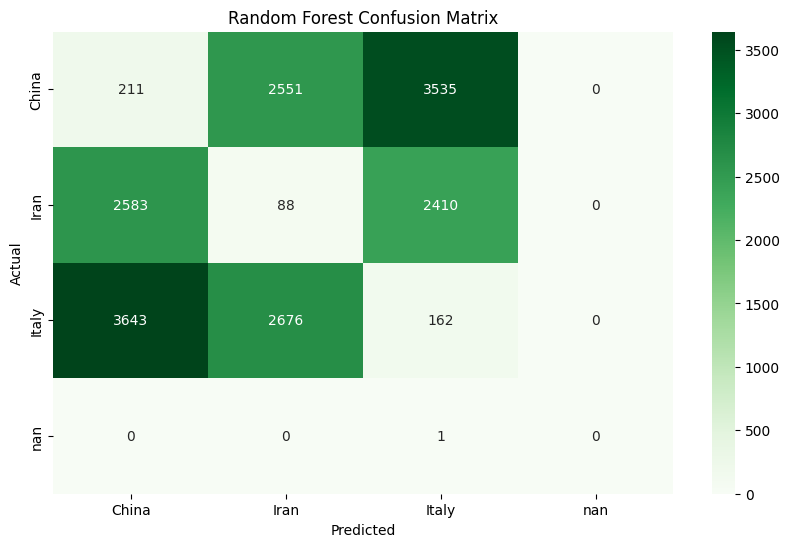

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

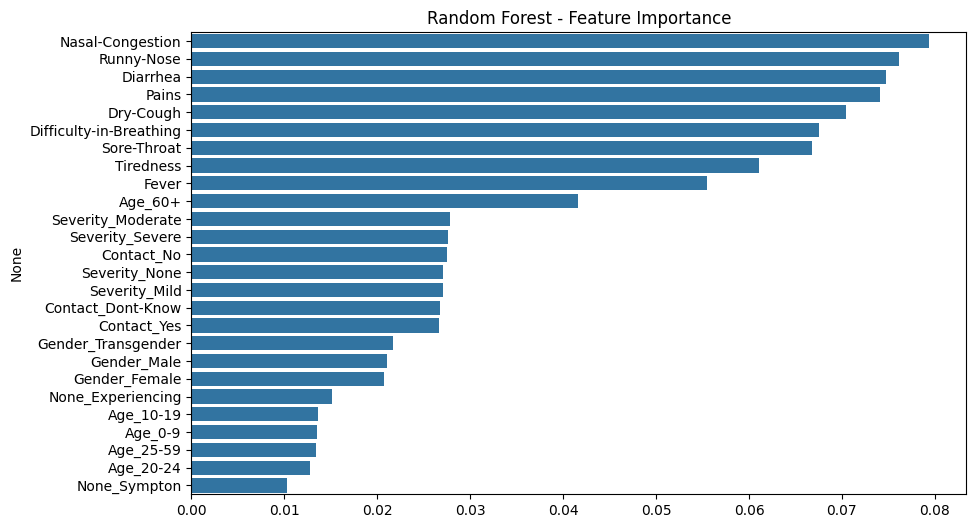

In [18]:
import numpy as np

rf_importances = rf.feature_importances_
indices = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances[indices], y=X.columns[indices])
plt.title("Random Forest - Feature Importance")
plt.show()

**K-Nearest Neighbors (KNN)**

In [20]:
from sklearn.impute import SimpleImputer

# Fill missing values in X_train and X_test with 0 (or you can use strategy='mean')
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [23]:
from sklearn.metrics import classification_report, accuracy_score
target_names = [str(cls) for cls in le.classes_]  # Convert labels to strings

# Evaluation
print("📍 KNN Classification Report")
print(classification_report(y_test, knn_pred, target_names=target_names, zero_division=0))

knn_acc = accuracy_score(y_test, knn_pred)
print(f"✅ Accuracy: {knn_acc:.2%}")



📍 KNN Classification Report
              precision    recall  f1-score   support

       China       0.20      0.28      0.23      6297
        Iran       0.15      0.15      0.15      5081
       Italy       0.14      0.08      0.10      6481
         nan       0.00      0.00      0.00         1

    accuracy                           0.17     17860
   macro avg       0.12      0.13      0.12     17860
weighted avg       0.16      0.17      0.16     17860

✅ Accuracy: 17.21%


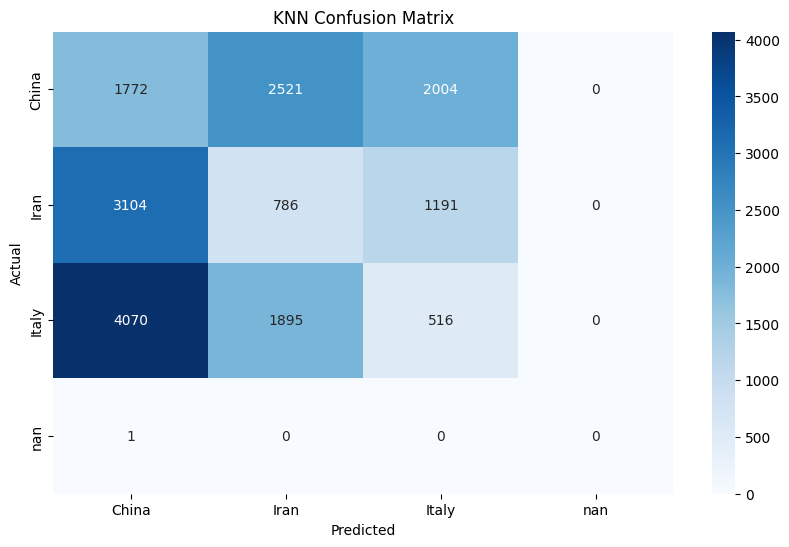

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

# Handle NaNs
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_imputed, y_train)

# Predict
y_pred = log_model.predict(X_test_imputed)

# Evaluate
print("📍 Logistic Regression Classification Report")
print(classification_report(y_test, y_pred, target_names=[str(cls) for cls in le.classes_], zero_division=0))
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2%}")


📍 Logistic Regression Classification Report
              precision    recall  f1-score   support

       China       0.37      0.38      0.38      6297
        Iran       0.33      0.51      0.40      5081
       Italy       0.36      0.19      0.25      6481
         nan       0.00      0.00      0.00         1

    accuracy                           0.35     17860
   macro avg       0.26      0.27      0.26     17860
weighted avg       0.35      0.35      0.34     17860

✅ Accuracy: 34.89%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


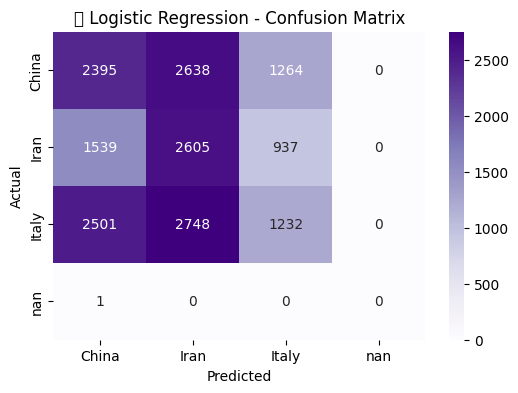

In [29]:
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("🧮 Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Compare All Models (Bar Graph)**

In [31]:
# These should already be computed
rf_acc = accuracy_score(y_test, rf_pred)
knn_acc = accuracy_score(y_test, knn_pred)
log_acc = accuracy_score(y_test, y_pred)  # from Logistic Regression


/tmp/ipython-input-34-3851189788.py:32: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


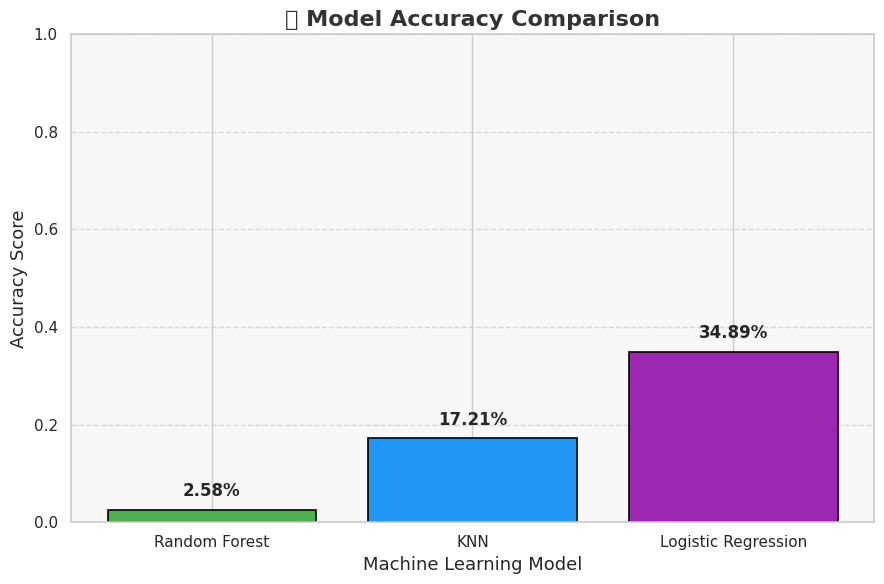

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for background
sns.set(style="whitegrid")

# Accuracy values (make sure these are already defined)
model_names = ['Random Forest', 'KNN', 'Logistic Regression']
accuracies = [rf_acc, knn_acc, log_acc]

# Custom colors
colors = ['#4CAF50', '#2196F3', '#9C27B0']  # green, blue, purple

# Plot
plt.figure(figsize=(9, 6))
bars = plt.bar(model_names, accuracies, color=colors, edgecolor='black', linewidth=1.2)

# Titles and labels
plt.title('🔍 Model Accuracy Comparison', fontsize=16, fontweight='bold', color='#333333')
plt.ylabel('Accuracy Score', fontsize=13)
plt.xlabel('Machine Learning Model', fontsize=13)
plt.ylim(0, 1)

# Annotate each bar with percentage
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{acc:.2%}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Background and layout
plt.gca().set_facecolor('#f7f7f7')  # Light gray background inside the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
